# **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

# **Read Data**

In [2]:
Credit_Name=pd.read_csv('C:/Users/Ruchit/Project/project-2/creditcard.csv')
Credit_Name.head()

C:\Users\Ruchit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


# **Data Cleaning**

In [3]:
Credit_Name.rename(columns={'NPA Status':'NPA STATUS'},inplace=True)
Credit_Name.head()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [4]:
Credit_Name.shape

(150002, 18)

In [5]:
Credit_Name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA STATUS                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [6]:
Credit_Name.isnull().sum()

NPA STATUS                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [7]:
Credit_Name=Credit_Name.dropna()

In [8]:
Credit_Name.shape

(120269, 18)

In [9]:
Credit_Name.head()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


# **Data Visualization**

In [10]:
Credit_Name.columns

Index(['NPA STATUS', 'RevolvingUtilizationOfUnsecuredLines', 'age', 'Gender',
       'Region', 'MonthlyIncome', 'Rented_OwnHouse', 'Occupation', 'Education',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome.1',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'Good_Bad'],
      dtype='object')

In [11]:
dscr_columns=[u'Gender',u'Region',u'Rented_OwnHouse',u'Occupation',u'Education',u'Good_Bad']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ruchit\anaconda3\li

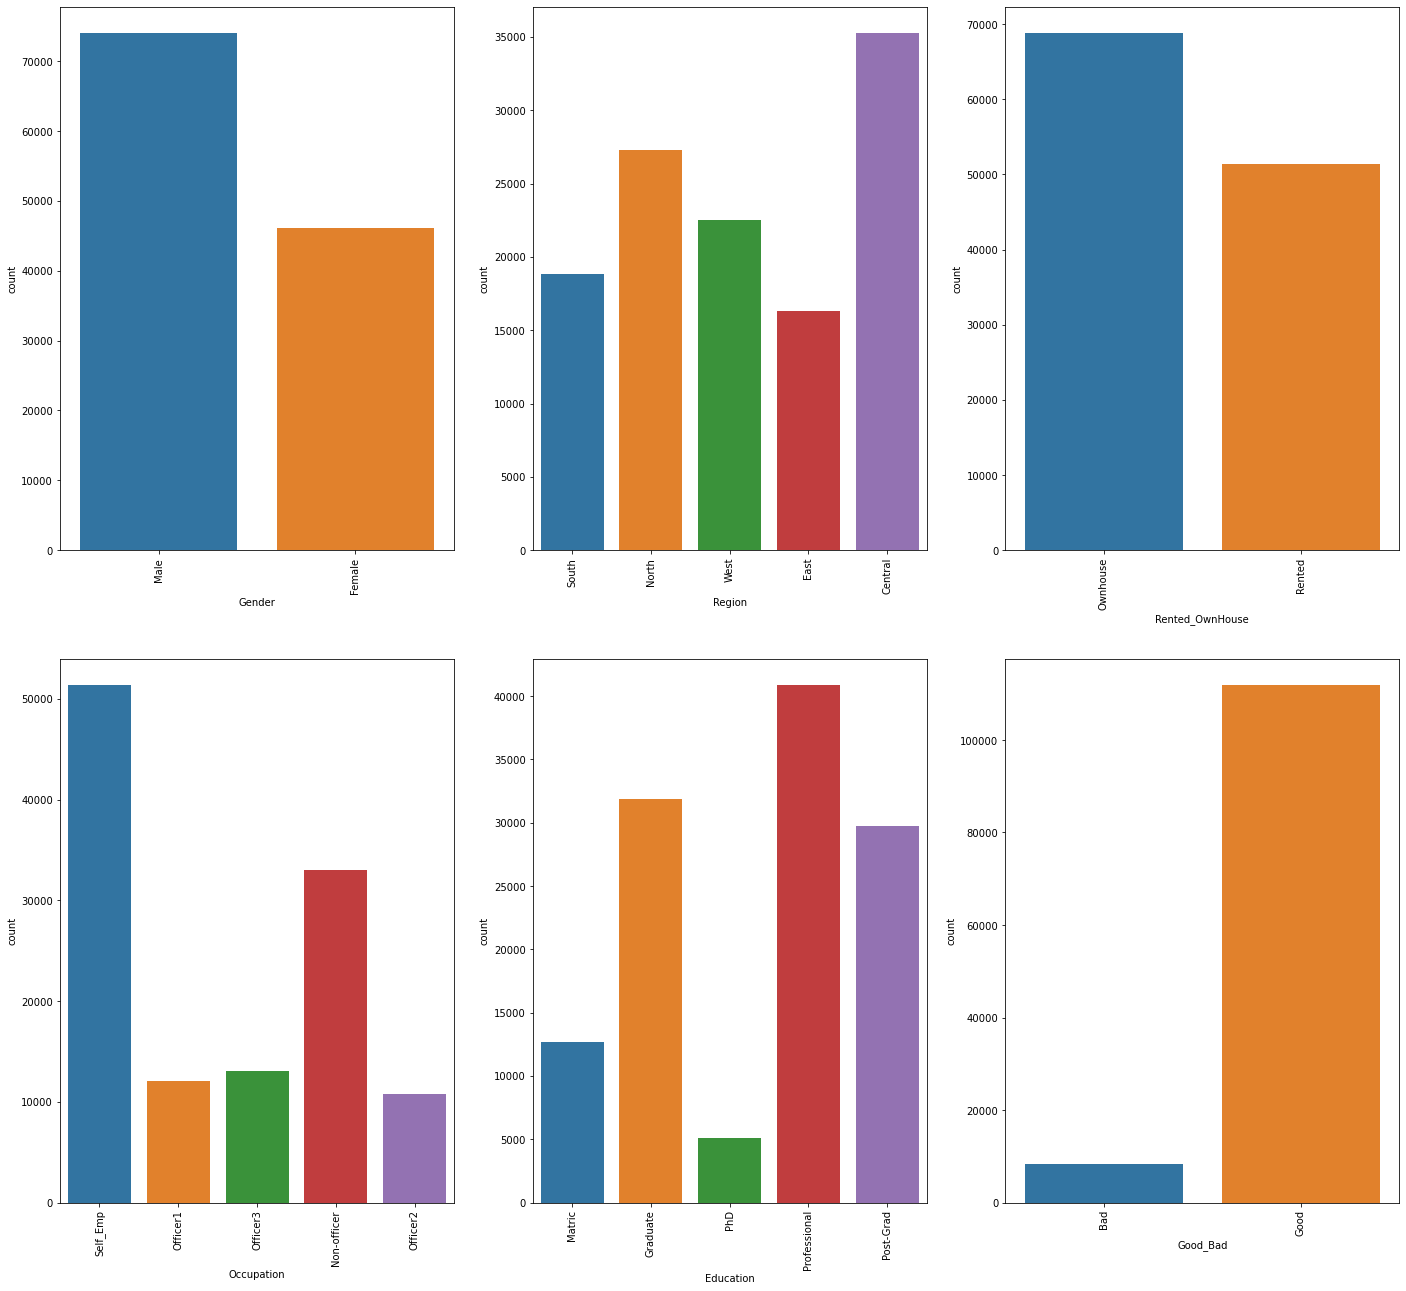

In [12]:
fig, ax=plt.subplots(2,3,figsize=(24,22))
for variable,subplot in zip(dscr_columns,ax.flatten()):
    sn.countplot(Credit_Name[variable],ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [13]:
Credit_Name.head()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [14]:
cont_columns=[u'NPA STATUS',u'age',u'NumberOfTime30-59DaysPastDueNotWorse',u'NumberOfOpenCreditLinesAndLoans',u'NumberOfTimes90DaysLate',u'NumberRealEstateLoansOrLines',u'NumberOfTime60-89DaysPastDueNotWorse',u'NumberOfDependents']

C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


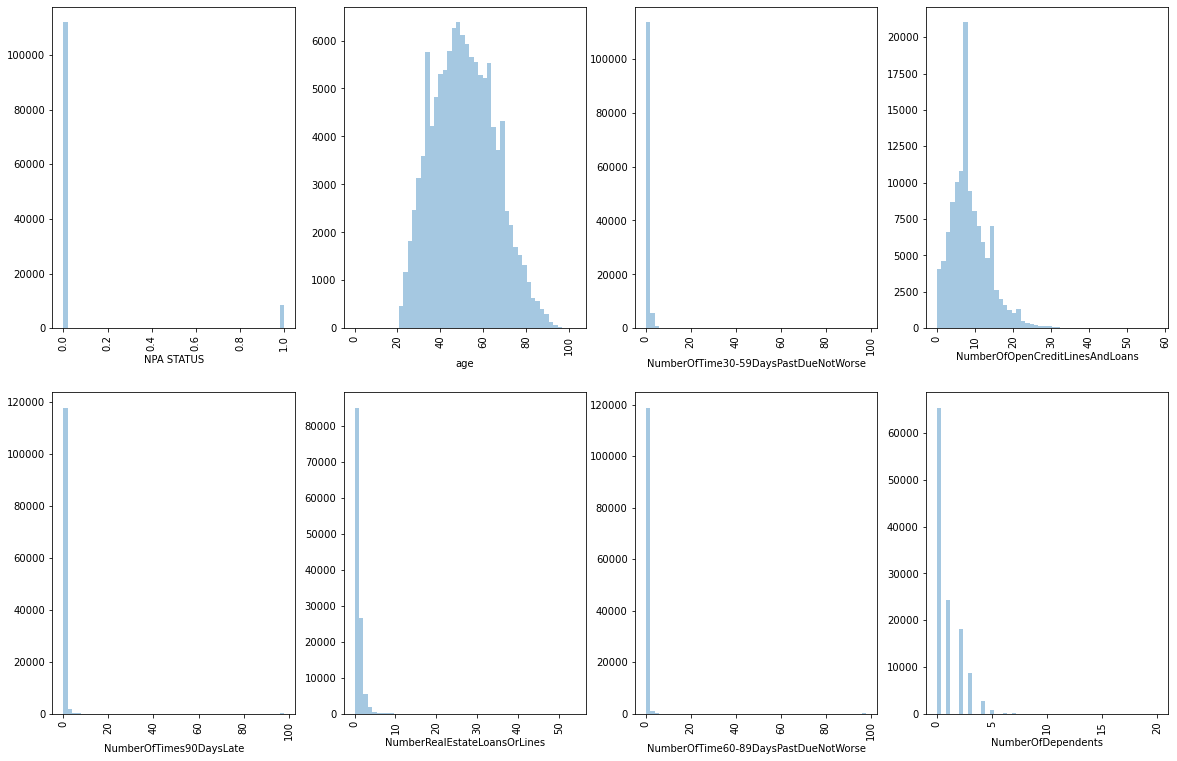

In [15]:
fig, ax=plt.subplots(2,4,figsize=(20,13))
for variable,subplot in zip(cont_columns,ax.flatten()):
    sn.distplot(Credit_Name[variable],ax=subplot,kde=False)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [16]:
Credit_Name['Gender'].value_counts()

Male      74090
Female    46179
Name: Gender, dtype: int64

In [17]:
Credit_Name['Region'].value_counts()

Central    35296
North      27298
West       22515
South      18860
East       16300
Name: Region, dtype: int64

In [18]:
Credit_Name['Rented_OwnHouse'].value_counts()

Ownhouse    68868
Rented      51401
Name: Rented_OwnHouse, dtype: int64

In [19]:
Credit_Name['Occupation'].value_counts()

Self_Emp       51390
Non-officer    33050
Officer3       13038
Officer1       12058
Officer2       10733
Name: Occupation, dtype: int64

In [20]:
Credit_Name['Good_Bad'].value_counts()

Good    111912
Bad       8357
Name: Good_Bad, dtype: int64

In [21]:
label=LabelEncoder()
def encoder(df,variable):
  df[variable]=label.fit_transform(df[variable])

In [22]:
encoder(Credit_Name,'Gender')
encoder(Credit_Name,'Region')
encoder(Credit_Name,'Rented_OwnHouse')
encoder(Credit_Name,'Occupation')
encoder(Credit_Name,'Good_Bad')

In [23]:
Credit_Name.head()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,1,3,9120.0,0,4,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,0
1,0.0,0.957151,40.0,0,3,2600.0,0,4,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,1
2,0.0,0.658180,38.0,0,3,3042.0,0,4,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,1
3,0.0,0.233810,30.0,0,3,3300.0,0,4,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,1
4,0.0,0.907239,49.0,1,3,63588.0,0,4,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,1


In [24]:
Credit_Name.tail()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
149994,0.0,0.385742,50.0,1,2,3400.0,1,2,Professional,0.0,0.404293,3400.0,7.0,0.0,0.0,0.0,0,1
149995,0.0,0.040674,74.0,1,2,2100.0,0,0,Professional,0.0,0.225131,2100.0,4.0,0.0,1.0,0.0,0,1
149996,0.0,0.299745,44.0,1,2,5584.0,0,4,Professional,0.0,0.716562,5584.0,4.0,0.0,1.0,0.0,2,1
149998,0.0,0.000000,30.0,1,2,5716.0,1,0,Professional,0.0,0.000000,5716.0,4.0,0.0,0.0,0.0,0,1
149999,0.0,0.850283,64.0,1,2,8158.0,0,4,Professional,0.0,0.249908,8158.0,8.0,0.0,2.0,0.0,0,1


In [25]:
X=Credit_Name.drop(['MonthlyIncome.1','Education','Good_Bad'],axis=1)
X.head()

,NPA STATUS,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,1,3,9120.0,0,4,2.0,0.802982,13.0,0.0,6.0,0.0,2
1,0.0,0.957151,40.0,0,3,2600.0,0,4,0.0,0.121876,4.0,0.0,0.0,0.0,1
2,0.0,0.658180,38.0,0,3,3042.0,0,4,1.0,0.085113,2.0,1.0,0.0,0.0,0
3,0.0,0.233810,30.0,0,3,3300.0,0,4,0.0,0.036050,5.0,0.0,0.0,0.0,0
4,0.0,0.907239,49.0,1,3,63588.0,0,4,1.0,0.024926,7.0,0.0,1.0,0.0,0


In [26]:
y=Credit_Name['Good_Bad']
y.head()

0    0
1    1
2    1
3    1
4    1
Name: Good_Bad, dtype: int32

# **Linear Regression**

In [27]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [28]:
lr=LinearRegression(normalize=True)

In [29]:
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [30]:
lr.score(x_train,y_train)

1.0

In [31]:
lr.coef_

array([-1.00000000e+00, -3.06350225e-20, -2.14554242e-17, -5.85338195e-16,
        1.81971746e-16, -2.64579054e-21, -5.88002119e-16,  2.03894612e-16,
        1.31313965e-16,  9.78885849e-20,  6.12134168e-17, -7.53406104e-17,
       -9.54857557e-17,  7.10640417e-17,  1.82953085e-16])

In [32]:
lr.intercept_

0.9999999999999789

In [33]:
y_train

72641     1
66105     1
68342     0
135687    1
54444     0
         ..
137584    1
149506    1
129392    1
1052      0
19774     1
Name: Good_Bad, Length: 84188, dtype: int32

In [34]:
y_pred=lr.predict(x_test)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [35]:
r2_score(y_test,y_pred)

1.0

In [36]:
lr.score(x_test,y_test)

1.0

In [37]:
R=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
R

,Actual,Predicted
110283,1,1.0
84332,1,1.0
12628,1,1.0
93266,1,1.0
45813,1,1.0
...,...,...
36616,1,1.0
41827,1,1.0
102622,1,1.0
91144,1,1.0


C:\Users\Ruchit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Good_Bad', ylabel='Density'>

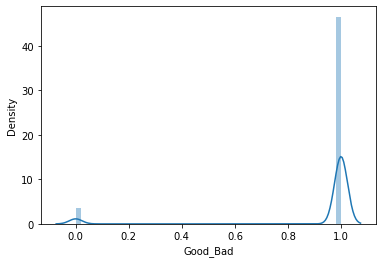

In [38]:
sn.distplot(y)

# **Decision Tree Regressor**

In [39]:
dtr=DecisionTreeRegressor(random_state=0)

In [40]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [41]:
y_pred=dtr.predict(x_test)

In [42]:
r2_score(y_test,y_pred)

1.0

In [43]:
dtr.score(x_train,y_train)

1.0

# **Classification**

In [44]:
Data=pd.read_csv('C:/Users/Ruchit/Project/project-2/creditcard.csv')
Data.head()

C:\Users\Ruchit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,Male,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,Female,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,Female,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,Female,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,Male,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


# **Data Cleaning**

In [45]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150002 entries, 0 to 150001
Data columns (total 18 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   NPA Status                            150000 non-null  float64
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  float64
 3   Gender                                150000 non-null  object 
 4   Region                                150000 non-null  object 
 5   MonthlyIncome                         120269 non-null  float64
 6   Rented_OwnHouse                       150000 non-null  object 
 7   Occupation                            150000 non-null  object 
 8   Education                             150000 non-null  object 
 9   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  float64
 10  DebtRatio                             150000 non-null  float64
 11  

In [46]:
Data.shape

(150002, 18)

In [47]:
Data.isnull().sum()

NPA Status                                  2
RevolvingUtilizationOfUnsecuredLines        2
age                                         2
Gender                                      2
Region                                      2
MonthlyIncome                           29733
Rented_OwnHouse                             2
Occupation                                  2
Education                                   2
NumberOfTime30-59DaysPastDueNotWorse        2
DebtRatio                                   2
MonthlyIncome.1                         29733
NumberOfOpenCreditLinesAndLoans             2
NumberOfTimes90DaysLate                     2
NumberRealEstateLoansOrLines                2
NumberOfTime60-89DaysPastDueNotWorse        2
NumberOfDependents                       3924
Good_Bad                                    2
dtype: int64

In [48]:
Data=Data.dropna()

In [49]:
Data.isnull().sum()

NPA Status                              0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
Gender                                  0
Region                                  0
MonthlyIncome                           0
Rented_OwnHouse                         0
Occupation                              0
Education                               0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome.1                         0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
Good_Bad                                0
dtype: int64

In [50]:
Data.describe()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse
count,120269.000000,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,1.202690e+05,120269.000000,120269.000000,120269.000000,120269.000000
mean,0.069486,5.899873,51.289792,6.670221e+03,0.381769,26.598777,6.670221e+03,8.758475,0.211925,1.054519,0.187829
std,0.254280,257.040685,14.426684,1.438467e+04,3.499234,424.446457,1.438467e+04,5.172835,3.465276,1.149273,3.447901
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.035084,40.000000,3.400000e+03,0.000000,0.143388,3.400000e+03,5.000000,0.000000,0.000000,0.000000
50%,0.000000,0.177282,51.000000,5.400000e+03,0.000000,0.296023,5.400000e+03,8.000000,0.000000,1.000000,0.000000
75%,0.000000,0.579428,61.000000,8.249000e+03,0.000000,0.482559,8.249000e+03,11.000000,0.000000,2.000000,0.000000
max,1.000000,50708.000000,103.000000,3.008750e+06,98.000000,61106.500000,3.008750e+06,58.000000,98.000000,54.000000,98.000000


In [51]:
Data['Gender']=Data['Gender'].map({'Female':0,'Male':1})
Data.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,Gender,Region,MonthlyIncome,Rented_OwnHouse,Occupation,Education,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,Good_Bad
0,1.0,0.766127,45.0,1,South,9120.0,Ownhouse,Self_Emp,Matric,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2,Bad
1,0.0,0.957151,40.0,0,South,2600.0,Ownhouse,Self_Emp,Graduate,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1,Good
2,0.0,0.658180,38.0,0,South,3042.0,Ownhouse,Self_Emp,PhD,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0,Good
3,0.0,0.233810,30.0,0,South,3300.0,Ownhouse,Self_Emp,Professional,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0,Good
4,0.0,0.907239,49.0,1,South,63588.0,Ownhouse,Self_Emp,Post-Grad,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0,Good


In [52]:
X=Data.drop(['Good_Bad','Region','Education','Occupation','Gender','Rented_OwnHouse'],axis=1)
X.head()

,NPA Status,RevolvingUtilizationOfUnsecuredLines,age,MonthlyIncome,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome.1,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45.0,9120.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2
1,0.0,0.957151,40.0,2600.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1
2,0.0,0.658180,38.0,3042.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0
3,0.0,0.233810,30.0,3300.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0
4,0.0,0.907239,49.0,63588.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0


In [53]:
X.shape

(120269, 12)

In [54]:
y=Data['Good_Bad']
y

0          Bad
1         Good
2         Good
3         Good
4         Good
          ... 
149994    Good
149995    Good
149996    Good
149998    Good
149999    Good
Name: Good_Bad, Length: 120269, dtype: object

# **KNN Classification**

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=42,test_size=0.3)

In [56]:
model=KNeighborsClassifier()
model.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred=model.predict(x_test)
y_pred

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)

In [58]:
y_test

68408     Good
38016     Good
260       Good
58846     Good
20416     Good
          ... 
131704    Good
25490     Good
94663     Good
33752     Good
141805     Bad
Name: Good_Bad, Length: 36081, dtype: object

In [59]:
k=np.arange(2,30)
train_accuracy=np.empty(len(k))
test_accuracy=np.empty(len(k))
for i,k in enumerate(k):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i]=knn.score(x_train,y_train)
    test_accuracy[i]=knn.score(x_test,y_test)
    print(train_accuracy[i])
    print(test_accuracy[i])

0.9662540979712073
0.8752251877719576
0.9429016011783152
0.926526426651146
0.9427946975816031
0.921066489287991
0.9346343896992445
0.9295196918045509
0.9352045422150426
0.9282170671544581
0.932104337910391
0.9305451622737729
0.9325200741198271
0.9299354230758571
0.9313560127334062
0.9307391702003824
0.9316054544590678
0.9306560239461212
0.930964032878795
0.9307391702003824
0.9309996674110325
0.9306560239461212
0.9308452511046705
0.9306837393642083
0.9309046419917328
0.9306837393642083
0.9307739820401958
0.930600593109947
0.9308096165724331
0.930600593109947
0.9307383475079584
0.93057287769186
0.9307621038627832
0.9305451622737729
0.9307621038627832
0.9305451622737729
0.9307739820401958
0.93057287769186
0.9307739820401958
0.93057287769186
0.9307739820401958
0.930600593109947
0.930702712975721
0.93057287769186
0.9307145911531335
0.93057287769186
0.930702712975721
0.9305451622737729
0.930702712975721
0.9305174468556858
0.930702712975721
0.93057287769186
0.930702712975721
0.93057287769186


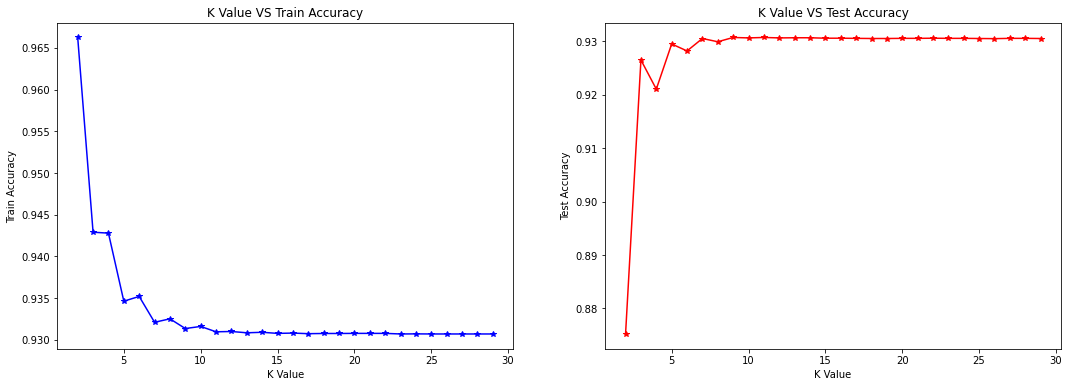

In [60]:
k=np.arange(2,30)
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(k,train_accuracy,color='blue',marker='*')
plt.title('K Value VS Train Accuracy')
plt.xlabel('K Value')
plt.ylabel('Train Accuracy')
plt.subplot(1,2,2)
plt.plot(k,test_accuracy,color='r',marker='*')
plt.title('K Value VS Test Accuracy')
plt.xlabel('K Value')
plt.ylabel('Test Accuracy')
plt.show()

In [61]:
idx=np.where(test_accuracy==max(test_accuracy))
x=k[idx]
x

array([ 9, 11])

In [62]:
model=KNeighborsClassifier(n_neighbors=x[0])
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [63]:
y_pred=model.predict(x_test)
y_pred

array(['Good', 'Good', 'Good', ..., 'Good', 'Good', 'Good'], dtype=object)

In [64]:
y_test

68408     Good
38016     Good
260       Good
58846     Good
20416     Good
          ... 
131704    Good
25490     Good
94663     Good
33752     Good
141805     Bad
Name: Good_Bad, Length: 36081, dtype: object

# **Confusion Matrix**

In [65]:
confusion_matrix(y_test,y_pred)

array([[   31,  2476],
       [   23, 33551]], dtype=int64)

In [66]:
pd.crosstab(y_test,y_pred)

col_0,Bad,Good
Good_Bad,,
Bad,31,2476
Good,23,33551


# **Accuracy Score**

In [67]:
accuracy_score(y_test,y_pred)

0.9307391702003824

# **Cross Value Score**

In [68]:
scores=cross_val_score(model,X,y,cv=5)
scores

array([0.93073917, 0.93061445, 0.93040659, 0.93094704, 0.93061157])

In [69]:
scores.mean()

0.9306637616327107

# **Classification Report**

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         Bad       0.57      0.01      0.02      2507
        Good       0.93      1.00      0.96     33574

    accuracy                           0.93     36081
   macro avg       0.75      0.51      0.49     36081
weighted avg       0.91      0.93      0.90     36081

